<b><font color='darkred'>
DATA UNDERSTANDING 
-----------------


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.lines as mlines
from matplotlib.lines import Line2D
from sklearn import preprocessing
import helper

/Users/melanie/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [7]:
b = '\033[1m' 
u = '\033[4m' 
red = '\033[31m'   
reset = '\033[0m'  

In [8]:
colors = ['green', 'orange', 'black', 'red', 'blue']
labels = ['OK-Schweißung', 'NEAR-OK-Sonotrodenwechsel', 'Öl auf Terminalversatz', 
          'Leitungsversatz', 'Terminalversatz']

DATA = ['ok', 'near_ok_sonowechsel', 'fehler_oel', 'fehler_leitungsversatz', 'fehler_terminversatz']

In [9]:
def iqr(series):
    return series.quantile(0.75) - series.quantile(0.25)

<b><font color='lightgreen'> Generierung eines labels als Zahl & eindeutiger key <br></b>falls doppelte Versuchsnummern existieren

In [10]:
label  = dict() 
for idx, fname in enumerate(DATA):
    label[fname] = idx
label

{'ok': 0,
 'near_ok_sonowechsel': 1,
 'fehler_oel': 2,
 'fehler_leitungsversatz': 3,
 'fehler_terminversatz': 4}

In [11]:
zugversuche, kurven = helper.read_data_orig()
zugversuche

nr                        key  label       label_name   festigkeit
0   1569                    ok_1569      0    OK-Schweißung  2600.000000
1   1570                    ok_1570      0    OK-Schweißung  2750.000000
2   1571                    ok_1571      0    OK-Schweißung  2770.000000
3   1572                    ok_1572      0    OK-Schweißung  2660.000000
4   1573                    ok_1573      0    OK-Schweißung  2810.000000
..   ...                        ...    ...              ...          ...
95  2505  fehler_terminversatz_2505      4  Terminalversatz  1479.522827
96  2506  fehler_terminversatz_2506      4  Terminalversatz  2085.117920
97  2507  fehler_terminversatz_2507      4  Terminalversatz  2237.231201
98  2508  fehler_terminversatz_2508      4  Terminalversatz  2406.469482
99  2509  fehler_terminversatz_2509      4  Terminalversatz  1606.889771

[600 rows x 5 columns]

In [12]:
kurven_df = helper.get_kurven_df(kurven).reset_index()
pattern = f"^({'|'.join(DATA)})"
kurven_df['group'] = kurven_df['key'].str.extract(pattern)[0]
kurven_df = kurven_df[['group'] + [col for col in kurven_df.columns if col != 'group']]

kurven_df['label_name'] = kurven_df['group'].map({'ok': 'OK-Schweißung', 
                                                  'near_ok_sonowechsel': 'NEAR-OK-Sonotrodenwechsel', 
                                                  'fehler_oel': 'Öl auf Terminalversatz', 
                                                  'fehler_leitungsversatz': 'Leitungsversatz', 
                                                  'fehler_terminversatz': 'Terminalversatz'})
kurven_df = kurven_df.drop('group', axis=1)
kurven_df

key    ms     power    force  dist  \
0                         ok_1569     1     0.000    0.000  0.00   
1                         ok_1569     2   106.204  502.701  0.00   
2                         ok_1569     3   106.204  500.748  0.00   
3                         ok_1569     4   108.646  502.701  0.00   
4                         ok_1569     5   108.646  504.654  0.00   
...                           ...   ...       ...      ...   ...   
968330  fehler_terminversatz_2509  1897  2070.600  555.925  3.23   
968331  fehler_terminversatz_2509  1898  2045.880  577.654  3.23   
968332  fehler_terminversatz_2509  1899  2080.680  548.112  3.23   
968333  fehler_terminversatz_2509  1900  2122.490  544.206  3.23   
968334  fehler_terminversatz_2509  1901  2139.880  569.842  3.23   

             label_name  
0         OK-Schweißung  
1         OK-Schweißung  
2         OK-Schweißung  
3         OK-Schweißung  
4         OK-Schweißung  
...                 ...  
968330  Terminalversatz  
968331  Terminalversatz  
968332  Terminalversatz  
968333  Terminalversatz  
968334  Terminalversatz  

[968335 rows x 6 columns]

In [13]:
zugversuche[zugversuche.isnull().any(axis=1)]

Empty DataFrame
Columns: [nr, key, label, label_name, festigkeit]
Index: []

In [14]:
kurven_df[kurven_df.isnull().any(axis=1)]

Empty DataFrame
Columns: [key, ms, power, force, dist, label_name]
Index: []

<font color='lightgreen'>____________________________________________________________________________________________________________________________________<br>    
<h4><b>
ZUGFESTIGKEIT

In [15]:
txt = f"Insgesamt gibt es {zugversuche.nr.count()} Schweißkurven. Es gibt {zugversuche.nr.nunique()} eindeutige Nummern zu den Schweißkurven. \n"
if zugversuche.nr.count() == zugversuche.nr.nunique():
    txt = txt + f"Das heißt, dass keine Versuchsnummer doppelt vorkommt. \n\n"
txt = txt + f"Für die {u}{red}Zugfestigkeit{reset} ergeben sich über alle Schweißversuche hinweg folgende statistische Kennzahlen: \n\n{zugversuche.festigkeit.describe().round(2)}"
print(txt)

Insgesamt gibt es 600 Schweißkurven. Es gibt 600 eindeutige Nummern zu den Schweißkurven. 
Das heißt, dass keine Versuchsnummer doppelt vorkommt. 

Für die Zugfestigkeit ergeben sich über alle Schweißversuche hinweg folgende statistische Kennzahlen: 

count     600.00
mean     2200.81
std       939.88
min         0.00
25%      2133.94
50%      2621.60
75%      2784.59
max      3170.00
Name: festigkeit, dtype: float64


<font color='lightgreen'>Verteilung der Zugfestigkeiten 


Im Histogramm ist deutlich zu erkennen, dass es Lücken im mittleren Wertebereich gibt.
Am häufigsten liegen die Zugfestigkeiten im Bereich von ca. 2500-3000 MPa.
Es gibt insgesamt 59 Schweißversuche aus der Klasse ['Öl auf Terminalversatz'], bei denen keine Zugfestigkeit gemessen werden konnte. 



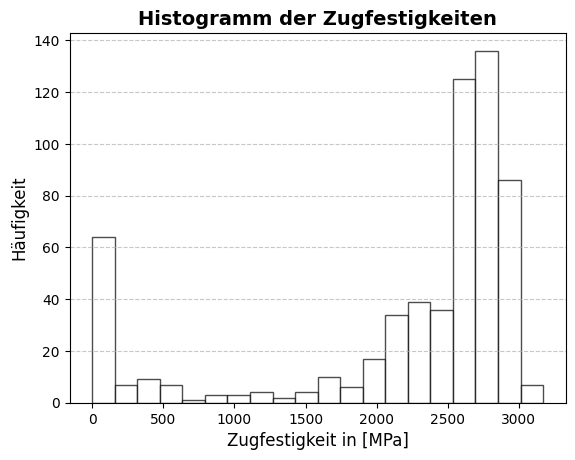

In [16]:
# Histogramm über Zugfestigkeiten die überhaupt auftreten -> viele 0-Werte und Lücken im mittleren Bereich
print(f"""
Im Histogramm ist deutlich zu erkennen, dass es Lücken im mittleren Wertebereich gibt.
Am häufigsten liegen die Zugfestigkeiten im Bereich von ca. 2500-3000 MPa.
Es gibt insgesamt {len(zugversuche[zugversuche['festigkeit']==0])} Schweißversuche aus der Klasse {zugversuche[zugversuche['festigkeit']==0].label_name.unique()}, bei denen keine Zugfestigkeit gemessen werden konnte. 
""")
#plt.figure(figsize=(10, 6))
zugversuche.festigkeit.plot(kind='hist', bins=20,  color='white', edgecolor='black', alpha=0.7)
plt.title('Histogramm der Zugfestigkeiten', fontsize=14, weight='bold')
plt.xlabel('Zugfestigkeit in [MPa]', fontsize=12)
plt.ylabel('Häufigkeit', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
print(f"""
Zu jeder Fehlklassifikation gibt es 100 Schweißversuche.
Für die Klasse 'ok' liegen 200 Schweißversuche vor.
Nur in der Klasse 'Öl auf Terminalversatz' konnte teilweise keine Zugfestigkeit gemessen werden.
Die höchste Zugfestigkeit wurde in der 'ok'-Klasse gemessen. Hier ist auch die Spannweite am geringsten.
Wenn die NEAR-OK-Sonotrodenwechsel-Klasse als Klasse eingeordnet wird, die in Ordnung ist, dann sind die 
Ok- und Nicht-Ok-Klassen gleichverteilt. Von beiden Klassen gibt es 300 Datensätze.
""")

grp_label = zugversuche.groupby(['label_name']).agg({
    'label': 'count',
    'festigkeit': ['min', 'mean', 'median', 'max', lambda x: x.max() - x.min(), 'std'],
}).round(2)
grp_label.columns = ['count', 'min', 'mean', 'median', 'max', 'range', 'std']
grp_label = grp_label.sort_values(by='count', ascending=False)
grp_label


Zu jeder Fehlklassifikation gibt es 100 Schweißversuche.
Für die Klasse 'ok' liegen 200 Schweißversuche vor.
Nur in der Klasse 'Öl auf Terminalversatz' konnte teilweise keine Zugfestigkeit gemessen werden.
Die höchste Zugfestigkeit wurde in der 'ok'-Klasse gemessen. Hier ist auch die Spannweite am geringsten.
Wenn die NEAR-OK-Sonotrodenwechsel-Klasse als Klasse eingeordnet wird, die in Ordnung ist, dann sind die 
Ok- und Nicht-Ok-Klassen gleichverteilt. Von beiden Klassen gibt es 300 Datensätze.



count      min     mean   median      max    range  \
label_name                                                                      
OK-Schweißung                200  2560.00  2838.30  2850.00  3170.00   610.00   
Leitungsversatz              100  2203.89  2625.34  2639.95  2860.15   656.26   
NEAR-OK-Sonotrodenwechsel    100  2214.45  2608.12  2619.14  2858.22   643.78   
Terminalversatz              100  1207.57  2047.15  2133.43  2406.47  1198.90   
Öl auf Terminalversatz       100     0.00   247.66     0.00  2070.00  2070.00   

                              std  
label_name                         
OK-Schweißung              108.52  
Leitungsversatz            118.38  
NEAR-OK-Sonotrodenwechsel  124.00  
Terminalversatz            250.46  
Öl auf Terminalversatz     425.79

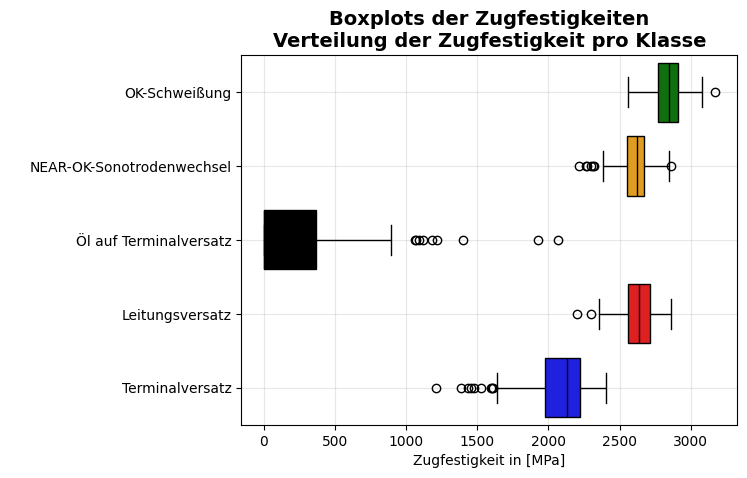

In [18]:
#plt.figure(figsize=(10, 6))
sns.boxplot(x='festigkeit', y='label_name', data=zugversuche, palette=colors, hue='label_name')
plt.title('Boxplots der Zugfestigkeiten\nVerteilung der Zugfestigkeit pro Klasse', weight='bold', fontsize=14)
plt.xlabel('Zugfestigkeit in [MPa]')
plt.ylabel(' ')
plt.grid(alpha=0.3)
plt.show()

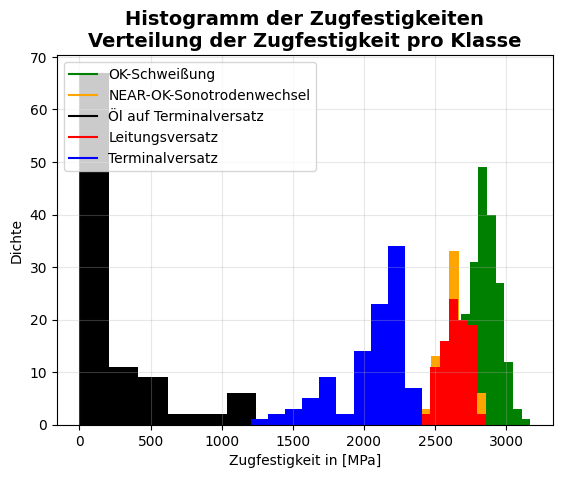

In [19]:
#plt.figure(figsize=(10, 6))
for label, color in zip(zugversuche['label'].unique(), colors):
    zugversuche[zugversuche['label'] == label]['festigkeit'].plot(
        kind='hist', color=color, linewidth=2)

handles = [mlines.Line2D([0], [0], color=color, label=label) for color, label in zip(colors, labels)]
plt.legend(handles=handles, loc='upper left')
plt.title('Histogramm der Zugfestigkeiten\nVerteilung der Zugfestigkeit pro Klasse', weight='bold', fontsize=14)
plt.xlabel('Zugfestigkeit in [MPa]')
plt.ylabel('Dichte')
plt.grid(alpha=0.3)
plt.show()

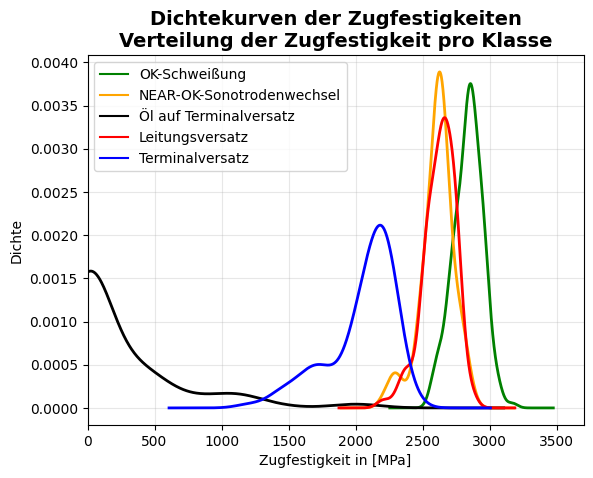

In [20]:
#plt.figure(figsize=(10, 6))
for label, color in zip(zugversuche['label'].unique(), colors):
    zugversuche[zugversuche['label'] == label]['festigkeit'].plot(
        kind='density', color=color, linewidth=2)

handles = [mlines.Line2D([0], [0], color=color, label=label) for color, label in zip(colors, labels)]
plt.legend(handles=handles, loc='upper left')
plt.title('Dichtekurven der Zugfestigkeiten\nVerteilung der Zugfestigkeit pro Klasse', weight='bold', fontsize=14)
plt.xlabel('Zugfestigkeit in [MPa]')
plt.ylabel('Dichte')
plt.xlim(left=0)
plt.grid(alpha=0.3)
plt.show()

<font color='lightgreen'><b> Zugfestigkeit = 0

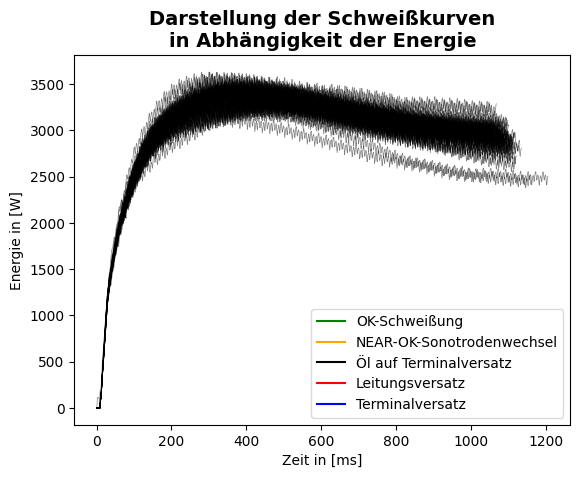

In [21]:
helper.class_curves(zugversuche[zugversuche['festigkeit']==0], kurven, 'power')

In [22]:
print(f"""
Es gibt insgesamt {len(zugversuche[zugversuche['festigkeit']==0])} Schweißversuche aus der Klasse {zugversuche[zugversuche['festigkeit']==0].label_name.unique()}, bei denen keine Zugfestigkeit gemessen werden konnte. 
Im folgenden Dataframe erkennt man, dass die Schweißungen stattgefunden haben und nicht direkt am Anfang abgebrochen sind. Daher ist es sinnvoll, 
die Datensätze aus dem Datenbestand zu entnehmen. Sie sind sonnvoll für die Modellerstellung.""")

keys = list(zugversuche[zugversuche['festigkeit']==0].key)
df_0 = pd.concat([kurven[key] for key in keys], ignore_index=True)
df_0.groupby('key').agg({'ms':'max'}).head(5)


Es gibt insgesamt 59 Schweißversuche aus der Klasse ['Öl auf Terminalversatz'], bei denen keine Zugfestigkeit gemessen werden konnte. 
Im folgenden Dataframe erkennt man, dass die Schweißungen stattgefunden haben und nicht direkt am Anfang abgebrochen sind. Daher ist es sinnvoll, 
die Datensätze aus dem Datenbestand zu entnehmen. Sie sind sonnvoll für die Modellerstellung.


ms
key                  
fehler_oel_2009  1160
fehler_oel_2010  1120
fehler_oel_2011  1121
fehler_oel_2013  1099
fehler_oel_2015  1097

<font color='lightgreen'>____________________________________________________________________________________________________________________________________<br>    
<h4><b>
VERTEILUNG DER FEATURES

In [23]:
print(f"Für die {u}{red}Features{reset} ergeben sich über alle Schweißversuche hinweg folgende statistische Kennzahlen:")
kurven_df.describe().round(2)

Für die Features ergeben sich über alle Schweißversuche hinweg folgende statistische Kennzahlen:


ms      power      force       dist
count  968335.00  968335.00  968335.00  968335.00
mean      829.08    2025.49     556.21       1.95
std       499.41     491.39      41.45       0.72
min         1.00       0.00       0.00       0.00
25%       404.00    1854.46     548.11       1.50
50%       807.00    2009.59     563.74       1.84
75%      1229.00    2140.40     577.65       2.28
max      2403.00    3630.44     628.92       4.17

In [24]:
kurven_grp = kurven_df.groupby(['label_name','key']).agg({
    'ms':    'max',
    'power': 'mean',
    'force': 'mean',
    'dist':  'mean',
}).reset_index()
kurven_grp

label_name                          key    ms        power  \
0           Leitungsversatz  fehler_leitungsversatz_2510  2184  1496.984688   
1           Leitungsversatz  fehler_leitungsversatz_2511  1960  1667.864518   
2           Leitungsversatz  fehler_leitungsversatz_2512  2327  1404.736245   
3           Leitungsversatz  fehler_leitungsversatz_2513  2176  1502.540441   
4           Leitungsversatz  fehler_leitungsversatz_2514  1848  1769.306656   
..                      ...                          ...   ...          ...   
595  Öl auf Terminalversatz              fehler_oel_2103  1052  3107.766870   
596  Öl auf Terminalversatz              fehler_oel_2104  1061  3081.005401   
597  Öl auf Terminalversatz              fehler_oel_2105  1084  3015.088223   
598  Öl auf Terminalversatz              fehler_oel_2106  1125  2905.752281   
599  Öl auf Terminalversatz              fehler_oel_2107  1068  3060.342813   

          force      dist  
0    556.295345  2.824002  
1    554.097198  2.843419  
2    555.554827  2.678294  
3    555.006163  2.952100  
4    552.854046  2.807131  
..          ...       ...  
595  561.260486  1.523651  
596  563.265743  1.434713  
597  562.390394  1.482242  
598  562.095747  1.497182  
599  561.817906  1.464523  

[600 rows x 6 columns]

<font color='lightgreen'>____________________________________________________________________________________________________________________________________<br>    
<h3><b>
Zeit

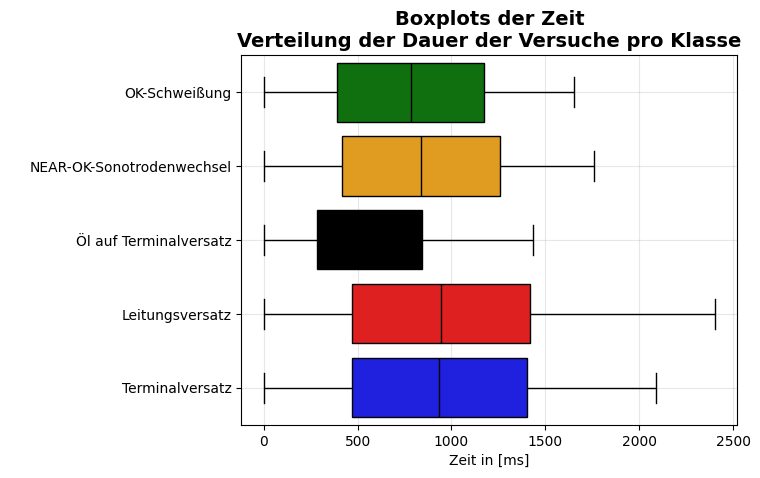

In [25]:
sns.boxplot(x='ms', y='label_name', data=kurven_df, palette=colors, hue='label_name')
plt.title('Boxplots der Zeit\nVerteilung der Dauer der Versuche pro Klasse', weight='bold', fontsize=14)
plt.xlabel('Zeit in [ms]')
plt.ylabel(' ')
plt.grid(alpha=0.3)
plt.show()

In [26]:
zeit_stat = kurven_df.groupby(['label_name','key']).agg({
    'ms': ['min', lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75), 'max', 'sum', lambda x: x.max()/x.sum() , iqr, 'mean', 'std'],
})
zeit_stat.columns = ['min', 'q25', 'median', 'q75', 'max', 'sum', 'max durch sum', 'iqr', 'mean', 'std']

zeit_grp = zeit_stat.copy()
zeit_grp = zeit_grp.reset_index().drop('key', axis=1)
zeit_grp = zeit_grp.groupby(['label_name']).agg({
    'min': 'min', 'q25': 'median', 'median': 'median', 'q75': 'median', 'max': 'max', 'sum': 'max', 'iqr': 'median', 'mean': 'median', 'std': 'median',  
})
zeit_grp

min      q25  median       q75   max      sum  \
label_name                                                                 
Leitungsversatz              1  461.625  922.25  1382.875  2403  2888406   
NEAR-OK-Sonotrodenwechsel    1  419.250  837.50  1255.750  1759  1547920   
OK-Schweißung                1  391.875  782.75  1173.625  1650  1362075   
Terminalversatz              1  466.375  931.75  1397.125  2092  2189278   
Öl auf Terminalversatz       1  277.875  554.75   831.625  1434  1028895   

                              iqr    mean         std  
label_name                                             
Leitungsversatz            921.25  922.25  532.316929  
NEAR-OK-Sonotrodenwechsel  836.50  837.50  483.386491  
OK-Schweißung              781.75  782.75  451.776563  
Terminalversatz            930.75  931.75  537.801756  
Öl auf Terminalversatz     553.75  554.75  320.140692

<font color='lightgreen'>____________________________________________________________________________________________________________________________________<br>    
<h3><b>
Power

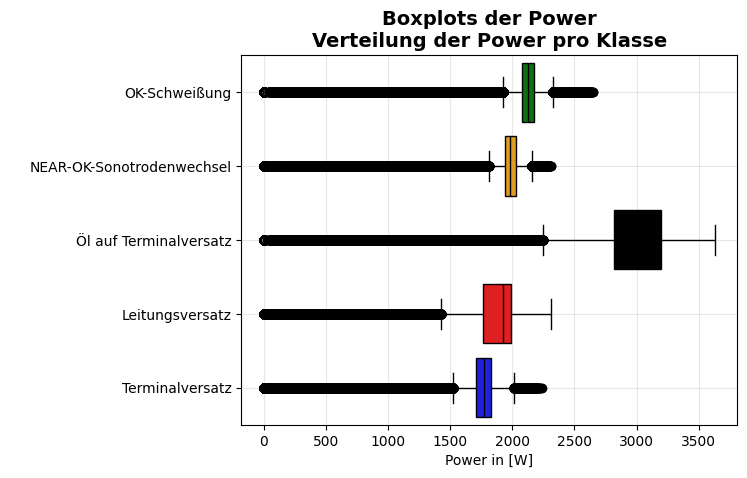

In [27]:
sns.boxplot(x='power', y='label_name', data=kurven_df, palette=colors, hue='label_name')
plt.title('Boxplots der Power\nVerteilung der Power pro Klasse', weight='bold', fontsize=14)
plt.xlabel('Power in [W]')
plt.ylabel(' ')
plt.grid(alpha=0.3)
plt.show()

In [28]:
power_stat = kurven_df.groupby(['label_name','key']).agg({
    'power': ['min', lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75), 'max', iqr, 'mean', 'std'],
})
power_stat.columns = ['min', 'q25', 'median', 'q75', 'max', 'iqr', 'mean', 'std']

power_grp = power_stat.copy()
power_grp = power_grp.reset_index().drop('key', axis=1)
power_grp = power_grp.groupby(['label_name']).agg({
    'min': 'min', 'q25': 'median', 'median': 'median', 'q75': 'median', 'max': 'max', 'iqr': 'median', 'mean': 'median', 'std': 'median', 
})
power_grp

min       q25    median       q75      max  \
label_name                                                              
Leitungsversatz            0.0  1843.525  1953.310  1989.360  2308.42   
NEAR-OK-Sonotrodenwechsel  0.0  1948.630  1979.795  2018.935  2315.15   
OK-Schweißung              0.0  2088.075  2124.440  2165.545  2652.97   
Terminalversatz            0.0  1732.430  1761.035  1815.415  2239.39   
Öl auf Terminalversatz     0.0  2953.020  3094.655  3220.115  3630.44   

                               iqr         mean         std  
label_name                                                   
Leitungsversatz            150.760  1773.574825  446.231850  
NEAR-OK-Sonotrodenwechsel   69.275  1953.147265  233.282884  
OK-Schweißung               76.600  2089.418280  254.042631  
Terminalversatz             79.050  1754.732774  196.741489  
Öl auf Terminalversatz     269.785  2948.535250  543.365289

<font color='lightgreen'>____________________________________________________________________________________________________________________________________<br>    
<h3><b>
Force

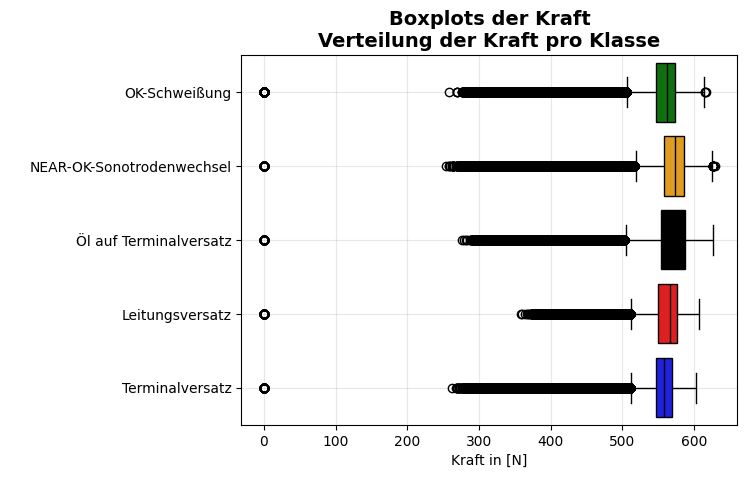

In [29]:
sns.boxplot(x='force', y='label_name', data=kurven_df, palette=colors, hue='label_name')
plt.title('Boxplots der Kraft\nVerteilung der Kraft pro Klasse', weight='bold', fontsize=14)
plt.xlabel('Kraft in [N]')
plt.ylabel(' ')
plt.grid(alpha=0.3)
plt.show()

In [30]:
force_stat = kurven_df.groupby(['label_name','key']).agg({
    'force': ['min', lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75), 'max', iqr, 'mean', 'std'],
})
force_stat.columns = ['min', 'q25', 'median', 'q75', 'max', 'iqr', 'mean', 'std']

force_grp = force_stat.copy()
force_grp = force_grp.reset_index().drop('key', axis=1)
force_grp = force_grp.groupby(['label_name']).agg({
    'min': 'min', 'q25': 'median', 'median': 'median', 'q75': 'median', 'max': 'max', 'iqr': 'median', 'mean': 'median', 'std': 'median',
})
force_grp

min      q25   median      q75      max        iqr  \
label_name                                                                      
Leitungsversatz            0.0  550.066  565.935  575.701  607.196  25.636000   
NEAR-OK-Sonotrodenwechsel  0.0  557.878  573.748  585.467  628.925  25.636000   
OK-Schweißung              0.0  548.112  561.785  573.748  617.206  24.170875   
Terminalversatz            0.0  546.159  559.832  569.842  603.290  23.683000   
Öl auf Terminalversatz     0.0  553.972  571.795  587.420  626.972  33.448000   

                                 mean        std  
label_name                                        
Leitungsversatz            553.807364  41.121380  
NEAR-OK-Sonotrodenwechsel  565.279508  42.869112  
OK-Schweißung              554.602207  39.451511  
Terminalversatz            551.778322  37.770616  
Öl auf Terminalversatz     561.716733  47.385954

In [31]:
kurven_df[kurven_df.force == 0]

key  ms  power  force  dist       label_name
0                         ok_1569   1    0.0    0.0   0.0    OK-Schweißung
1418                      ok_1570   1    0.0    0.0   0.0    OK-Schweißung
2958                      ok_1571   1    0.0    0.0   0.0    OK-Schweißung
4491                      ok_1572   1    0.0    0.0   0.0    OK-Schweißung
6075                      ok_1573   1    0.0    0.0   0.0    OK-Schweißung
...                           ...  ..    ...    ...   ...              ...
959123  fehler_terminversatz_2505   1    0.0    0.0   0.0  Terminalversatz
961013  fehler_terminversatz_2506   1    0.0    0.0   0.0  Terminalversatz
962829  fehler_terminversatz_2507   1    0.0    0.0   0.0  Terminalversatz
964658  fehler_terminversatz_2508   1    0.0    0.0   0.0  Terminalversatz
966434  fehler_terminversatz_2509   1    0.0    0.0   0.0  Terminalversatz

[600 rows x 6 columns]

<font color='lightgreen'>____________________________________________________________________________________________________________________________________<br>    
<h3><b>
Distance

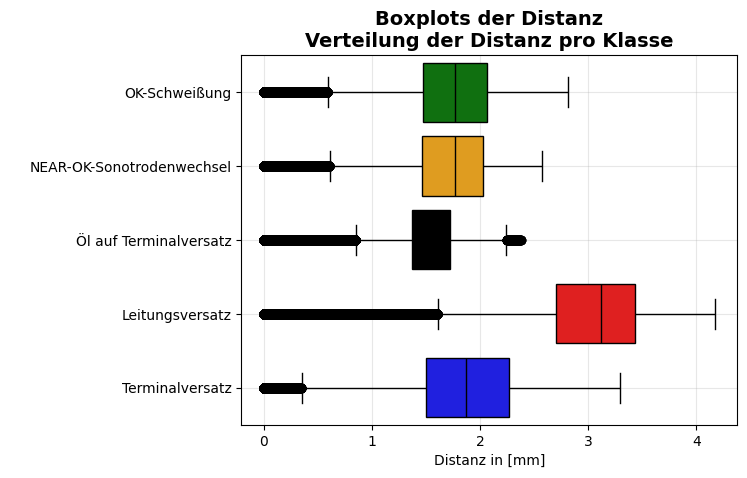

In [32]:
sns.boxplot(x='dist', y='label_name', data=kurven_df, palette=colors, hue='label_name')
plt.title('Boxplots der Distanz\nVerteilung der Distanz pro Klasse', weight='bold', fontsize=14)
plt.xlabel('Distanz in [mm]')
plt.ylabel(' ')
plt.grid(alpha=0.3)
plt.show()

In [33]:
dist_stat = kurven_df.groupby(['label_name','key']).agg({
    'dist':  ['min', lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75), 'max', iqr, 'mean', 'std'],
})
dist_stat.columns = ['min', 'q25', 'median', 'q75', 'max', 'iqr', 'mean', 'std']

dist_grp = dist_stat.copy()
dist_grp = dist_grp.reset_index().drop('key', axis=1)
dist_grp = dist_grp.groupby(['label_name']).agg({
    'min': 'min', 'q25': 'median', 'median': 'median', 'q75': 'median', 'max': 'max', 'iqr': 'median', 'mean': 'median', 'std': 'median', 
})
dist_grp

min       q25    median      q75   max      iqr  \
label_name                                                                   
Leitungsversatz            0.0  2.700000  3.130000  3.42000  4.17  0.67375   
NEAR-OK-Sonotrodenwechsel  0.0  1.480000  1.780000  2.04000  2.57  0.56000   
OK-Schweißung              0.0  1.480000  1.780000  2.06001  2.81  0.59000   
Terminalversatz            0.0  1.490005  1.855005  2.26000  3.29  0.77000   
Öl auf Terminalversatz     0.0  1.380000  1.570000  1.72000  2.38  0.34500   

                               mean       std  
label_name                                     
Leitungsversatz            2.873763  0.775804  
NEAR-OK-Sonotrodenwechsel  1.718301  0.422194  
OK-Schweißung              1.732094  0.437197  
Terminalversatz            1.849650  0.522842  
Öl auf Terminalversatz     1.496051  0.332255

<font color='lightgreen'>____________________________________________________________________________________________________________________________________<br> 
<b><h3>Darstellung der Schweisskurven

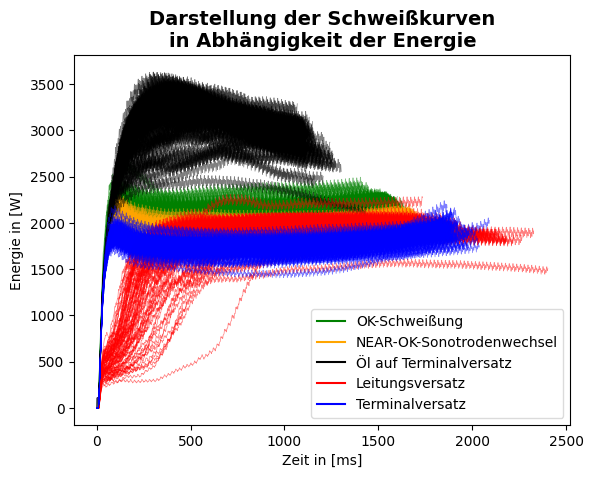

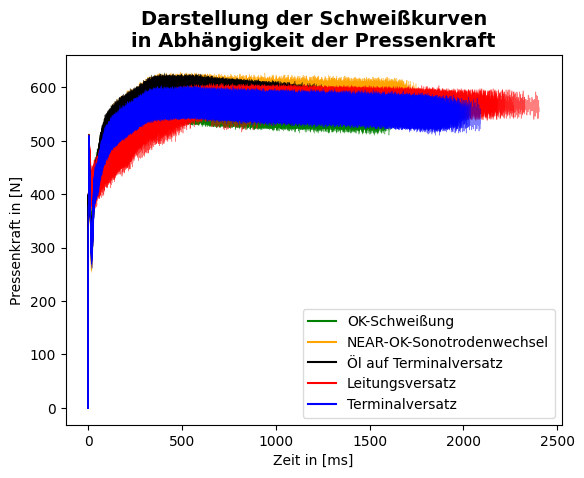

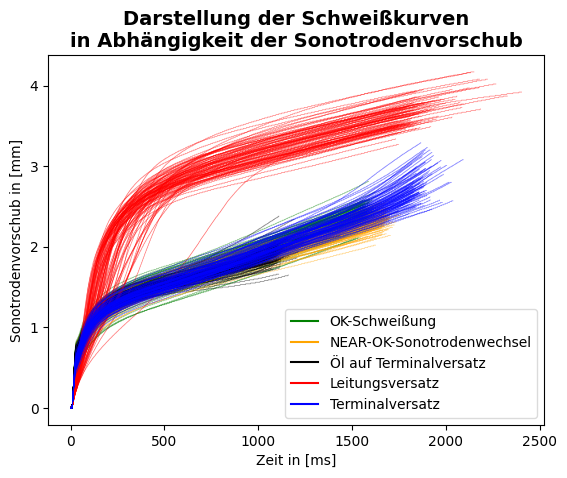

In [34]:
helper.class_curves(zugversuche, kurven, 'power')
helper.class_curves(zugversuche, kurven, 'force')
helper.class_curves(zugversuche, kurven, 'dist')

<font color='lightgreen'>____________________________________________________________________________________________________________________________________<br> 
<b><h3>Darstellung der Schweisskurven in Betracht auf die Zugfestigkeit

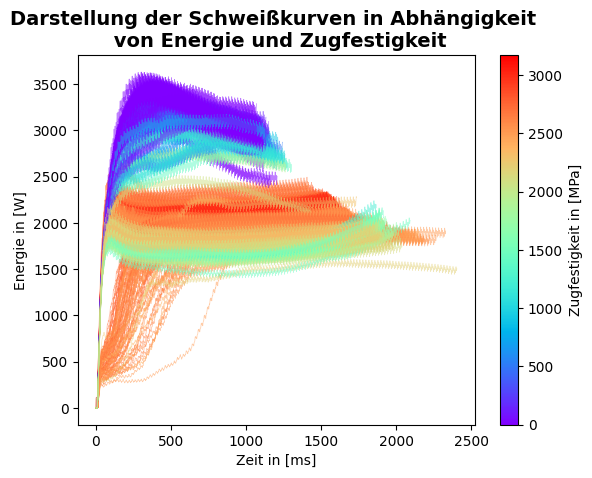

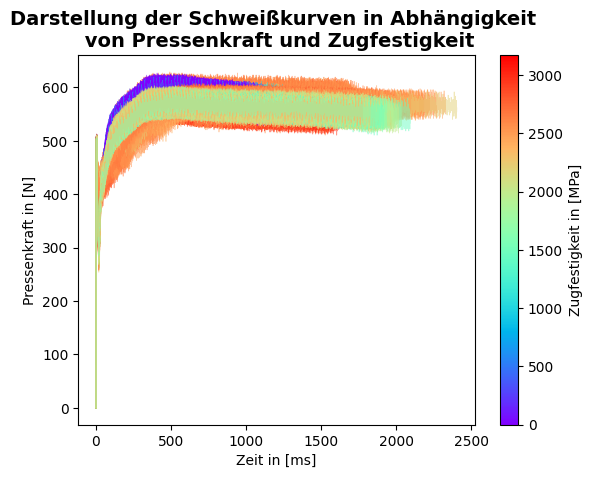

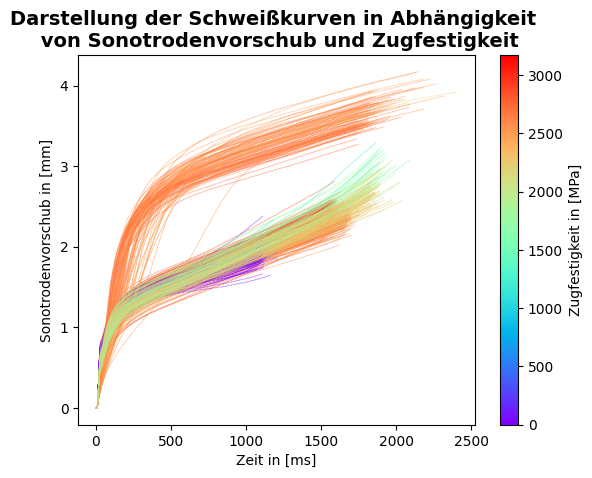

In [35]:
helper.zug_curves(zugversuche, kurven, 'power')
helper.zug_curves(zugversuche, kurven, 'force')
helper.zug_curves(zugversuche, kurven, 'dist')

<font color='lightgreen'>____________________________________________________________________________________________________________________________________<br> 
<b><h3>Darstellung der gemittelten Schweisskurven in Betracht auf die Zugfestigkeit

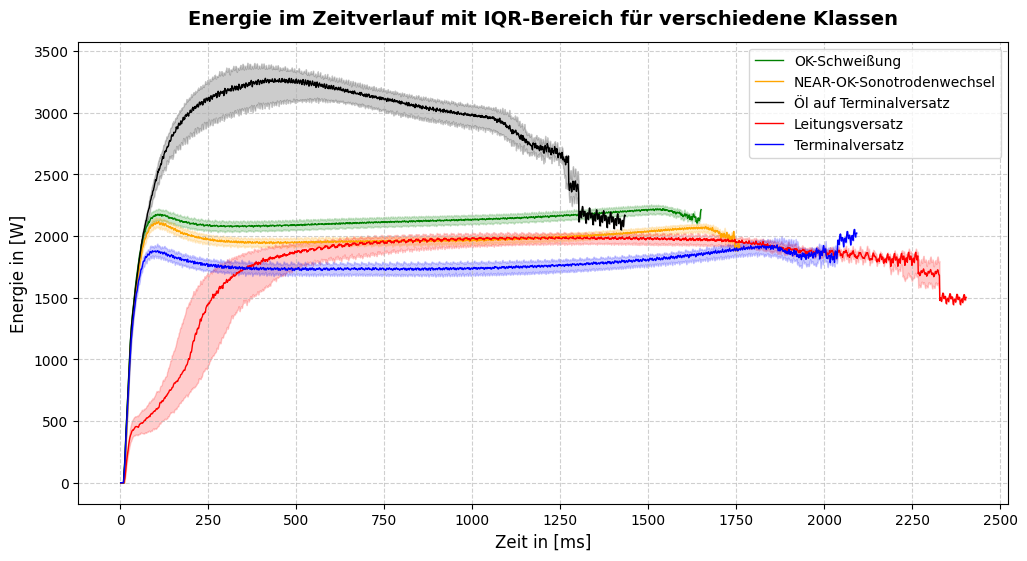

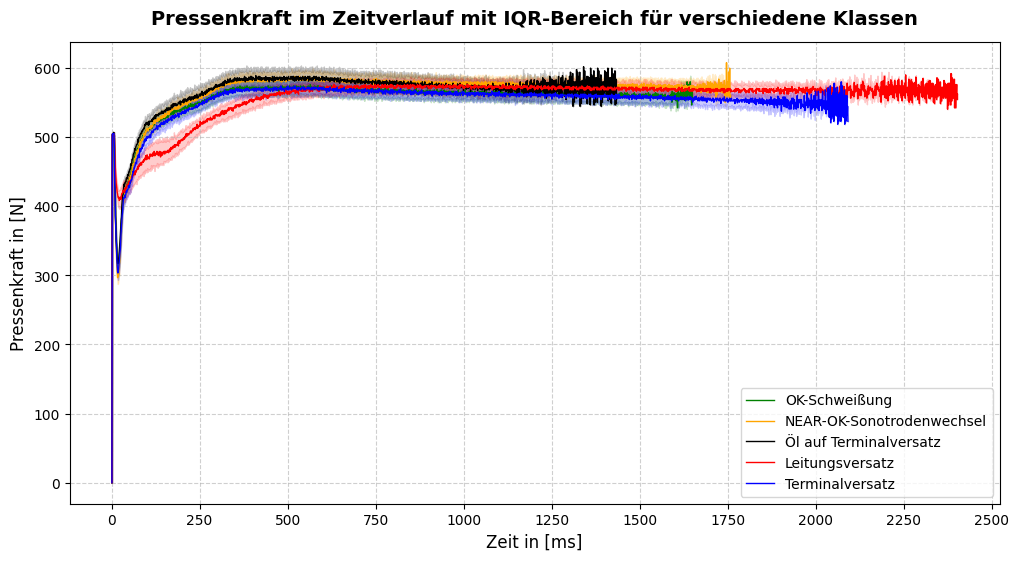

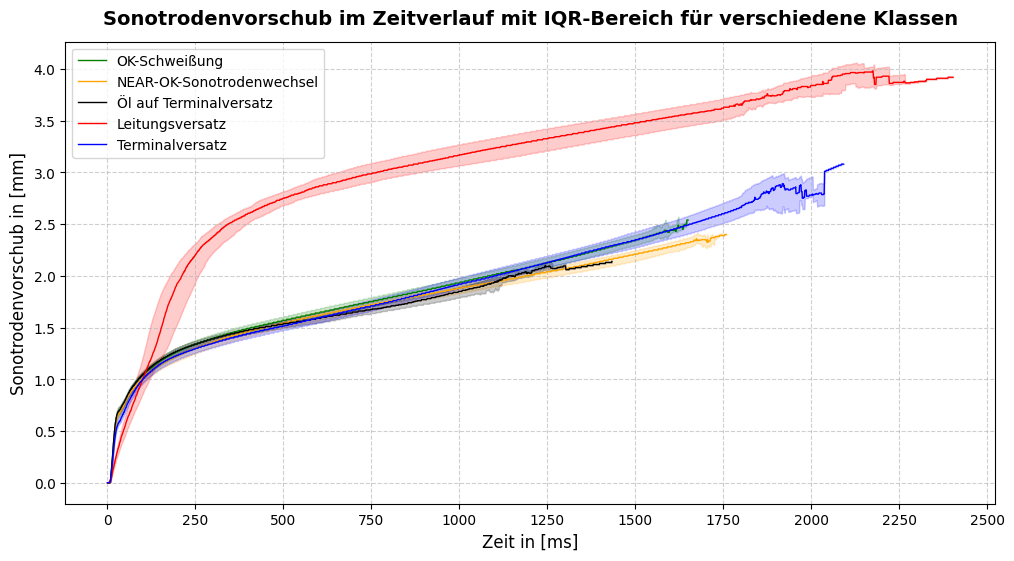

In [36]:
helper.plotIQRcurve(kurven_df, 'power')
helper.plotIQRcurve(kurven_df, 'force')
helper.plotIQRcurve(kurven_df, 'dist')

<font color='lightgreen'>____________________________________________________________________________________________________________________________________<br> 
<b><h3>die relevantesten Features herausfinden

<b><font color='lightgreen'> Skalieren der Daten

In [64]:
SCALE = 2000

STATS = [
    # Power (p_*)
    "p_median", "p_std", "p_max", "p_q25", "p_q75", 
    "p_f_ratio", "p_d_ratio", "p_t_ratio", #"p_b75",
    
    # Force (f_*)
    "f_median", "f_std", "f_max", "f_q25", "f_q75", 
    "f_d_ratio", "f_t_ratio", #"f_b75",
    
    # Distance (d_*)
    "d_median", "d_std", "d_max", "d_q25", "d_q75", 
    "d_t_ratio", "d_b75",
    
    # Zeitmerkmale
    "t_max",
]

# mean nicht verwenden, da zu ähnlich zum median

stat_feat = helper.StatFeatures(STATS)
stat_feat.fit()

X = stat_feat.transform(zugversuche.key, kurven)
X.shape

(600, 23)

In [65]:
X_label      = zugversuche.label.values
X_festigkeit = zugversuche.festigkeit.values

std_scaler   = preprocessing.StandardScaler()
X_scaled     = std_scaler.fit_transform(X)
X_festigkeit = X_festigkeit/SCALE

X_df = pd.DataFrame(X, columns=STATS)
X_df['festigkeit'] = X_festigkeit
X_df

p_median       p_std    p_max    p_q25    p_q75  p_f_ratio    p_d_ratio  \
0     2350.54  274.663394  2500.99  2313.30  2382.58   4.263183  1438.822854   
1     2163.50  253.240436  2296.86  2125.65  2195.54   3.896916  1237.116628   
2     2171.35  262.612802  2319.37  2131.98  2215.91   3.910223  1364.033765   
3     2093.53  252.261096  2290.99  2046.53  2150.30   3.793616  1159.988059   
4     2158.57  257.975091  2291.94  2124.09  2190.92   3.901293  1167.104071   
..        ...         ...      ...      ...      ...        ...          ...   
595   1714.05  209.292028  2161.15  1679.57  1783.33   3.139327   868.490689   
596   1816.37  202.465232  2013.82  1793.48  1855.74   3.276701   938.050675   
597   1801.11  205.789826  2026.03  1764.18  1858.18   3.245907   914.805840   
598   1860.62  207.020386  2035.79  1833.46  1899.99   3.337825   990.394479   
599   1695.53  213.151850  2139.88  1665.93  1786.78   3.113853   816.706614   

     p_t_ratio  f_median      f_std  ...  f_t_ratio  d_median     d_std  \
0     3.248327   548.112  38.474875  ...   0.761949   1.66000  0.386393   
1     2.754989   552.019  37.259084  ...   0.706966   1.75000  0.427626   
2     2.780507   552.019  36.301998  ...   0.711087   1.59000  0.427737   
3     2.604665   552.019  38.868855  ...   0.686592   1.82000  0.441997   
4     2.745016   550.066  38.887874  ...   0.703617   1.87000  0.432708   
..         ...       ...        ...  ...        ...       ...       ...   
595   1.828827   557.878  37.428138  ...   0.582554   1.98000  0.625571   
596   1.982010   557.878  39.651911  ...   0.604880   1.95000  0.509015   
597   1.953104   557.878  39.243893  ...   0.601713   1.96999  0.519025   
598   2.071324   559.832  39.716255  ...   0.620561   1.89000  0.491973   
599   1.807989   559.832  38.890119  ...   0.580628   2.11000  0.620574   

       d_max  d_q25    d_q75  d_t_ratio   d_b75   t_max  festigkeit  
0    2.14001   1.41  1.89001   0.002258   631.0  1418.0    1.300000  
1    2.36000   1.47  2.05000   0.002227   785.0  1540.0    1.375000  
2    2.24000   1.30  1.89999   0.002038   888.0  1533.0    1.385000  
3    2.45000   1.52  2.12000   0.002245   813.0  1584.0    1.330000  
4    2.44000   1.57  2.15000   0.002352   709.0  1543.0    1.405000  
..       ...    ...      ...        ...     ...     ...         ...  
595  3.20000   1.56  2.45000   0.002106  1380.0  1890.0    0.739761  
596  2.75000   1.58  2.32000   0.002113  1039.0  1816.0    1.042559  
597  2.82000   1.62  2.36000   0.002135  1078.0  1829.0    1.118616  
598  2.64000   1.54  2.25000   0.002091   993.0  1776.0    1.203235  
599  3.23000   1.68  2.58000   0.002214  1275.0  1901.0    0.803445  

[600 rows x 24 columns]

<b><font color='lightgreen'> Korrelationsmatrix

In [66]:
corr_matrix = X_df.corr()['festigkeit'].abs().sort_values(ascending=False)
# Top 15 Features mit höchster Korrelation anzeigen
corr_matrix.head(16)

festigkeit    1.000000
p_max         0.856469
p_t_ratio     0.831814
p_q75         0.827983
p_median      0.806287
f_t_ratio     0.792166
p_f_ratio     0.785286
p_q25         0.764026
p_d_ratio     0.736833
t_max         0.672000
p_std         0.661202
f_std         0.621945
f_max         0.476645
f_d_ratio     0.468075
f_q75         0.442617
d_b75         0.427134
Name: festigkeit, dtype: float64

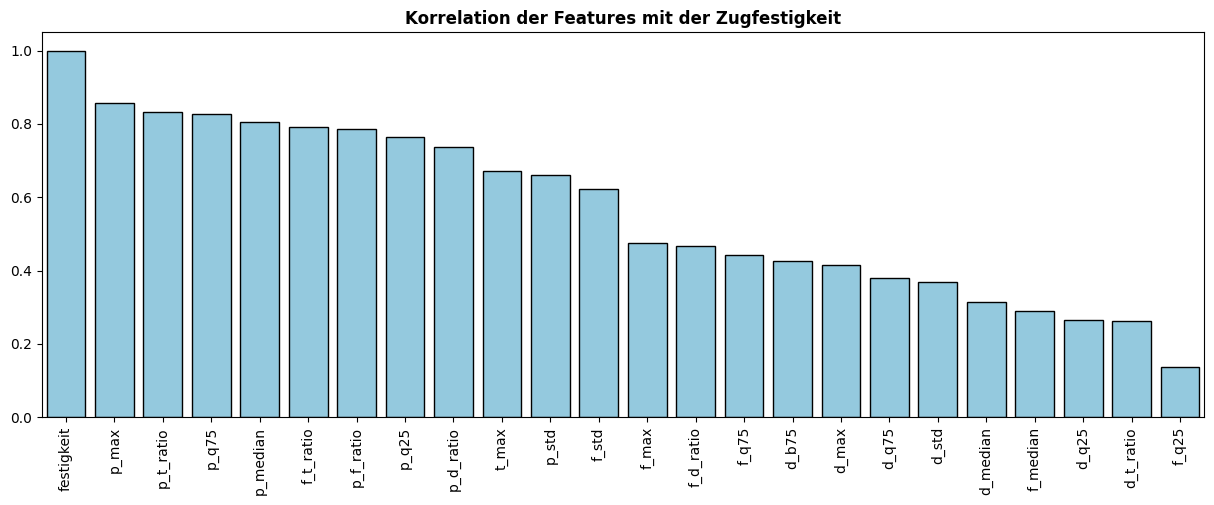

In [67]:
plt.figure(figsize=(15, 5))
sns.barplot(x=corr_matrix.index, y=corr_matrix.values, color='skyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel("")
plt.title("Korrelation der Features mit der Zugfestigkeit", weight='bold')
plt.show()

<b><font color='lightgreen'> Korrelationsmatrix als Heatmap

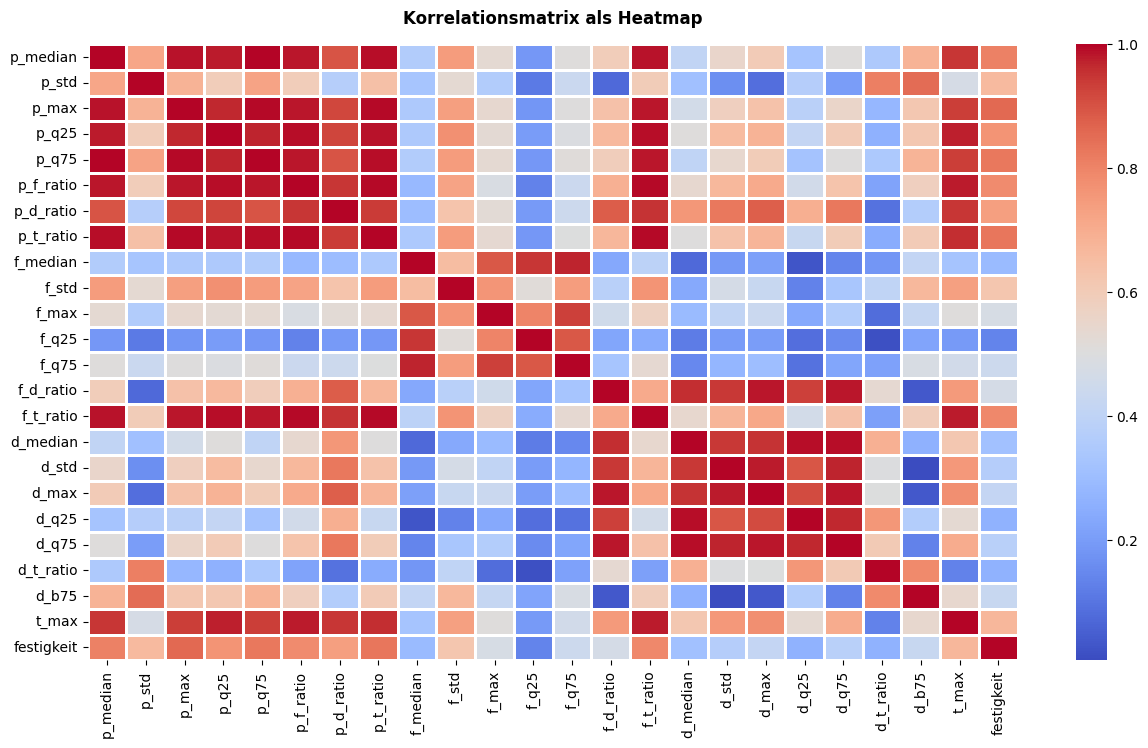

In [68]:
plt.figure(figsize = (15,8))
sns.heatmap(X_df.corr().abs(), cmap='coolwarm', linecolor='white',linewidths=1)
plt.title("Korrelationsmatrix als Heatmap", y=1.02, weight='bold')
plt.show()

<b><font color='lightgreen'> Scatter Matrix (Farbe ist Zielgröße)

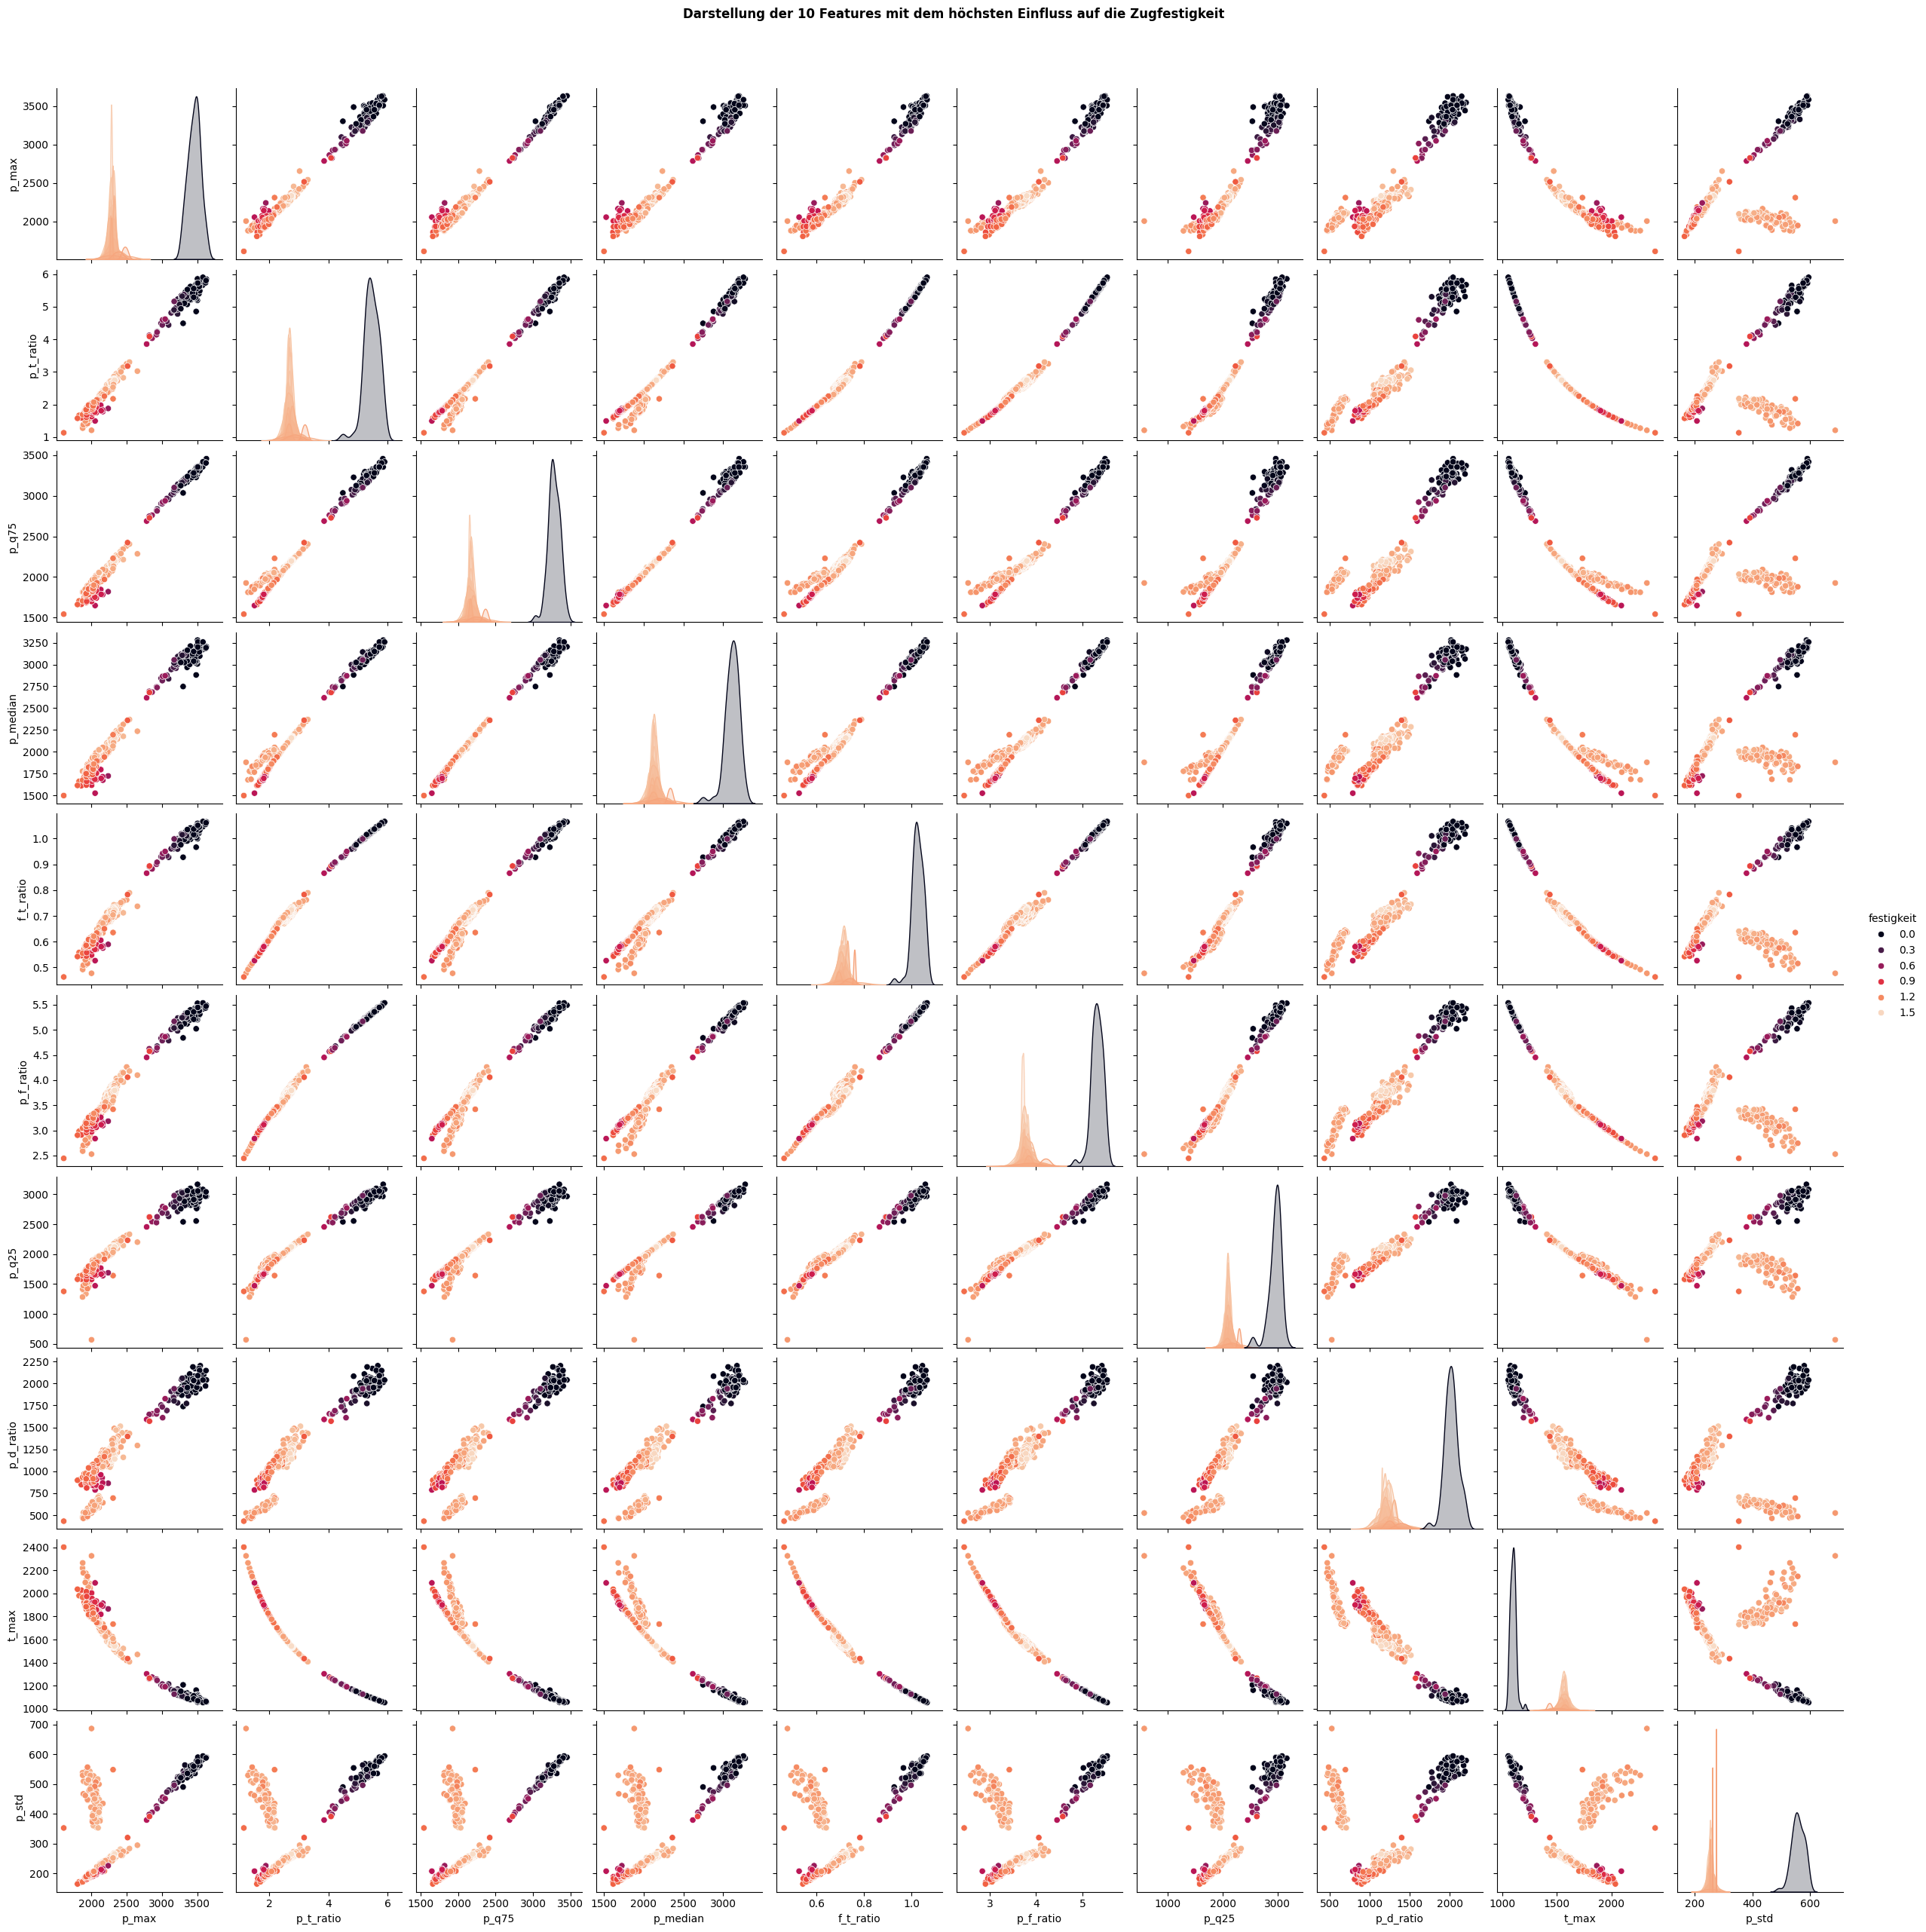

In [69]:
good = sns.pairplot(X_df[corr_matrix.head(11).index], hue='festigkeit', palette='rocket')
plt.suptitle("Darstellung der 10 Features mit dem höchsten Einfluss auf die Zugfestigkeit", y=1.03, weight='bold')
plt.show()  

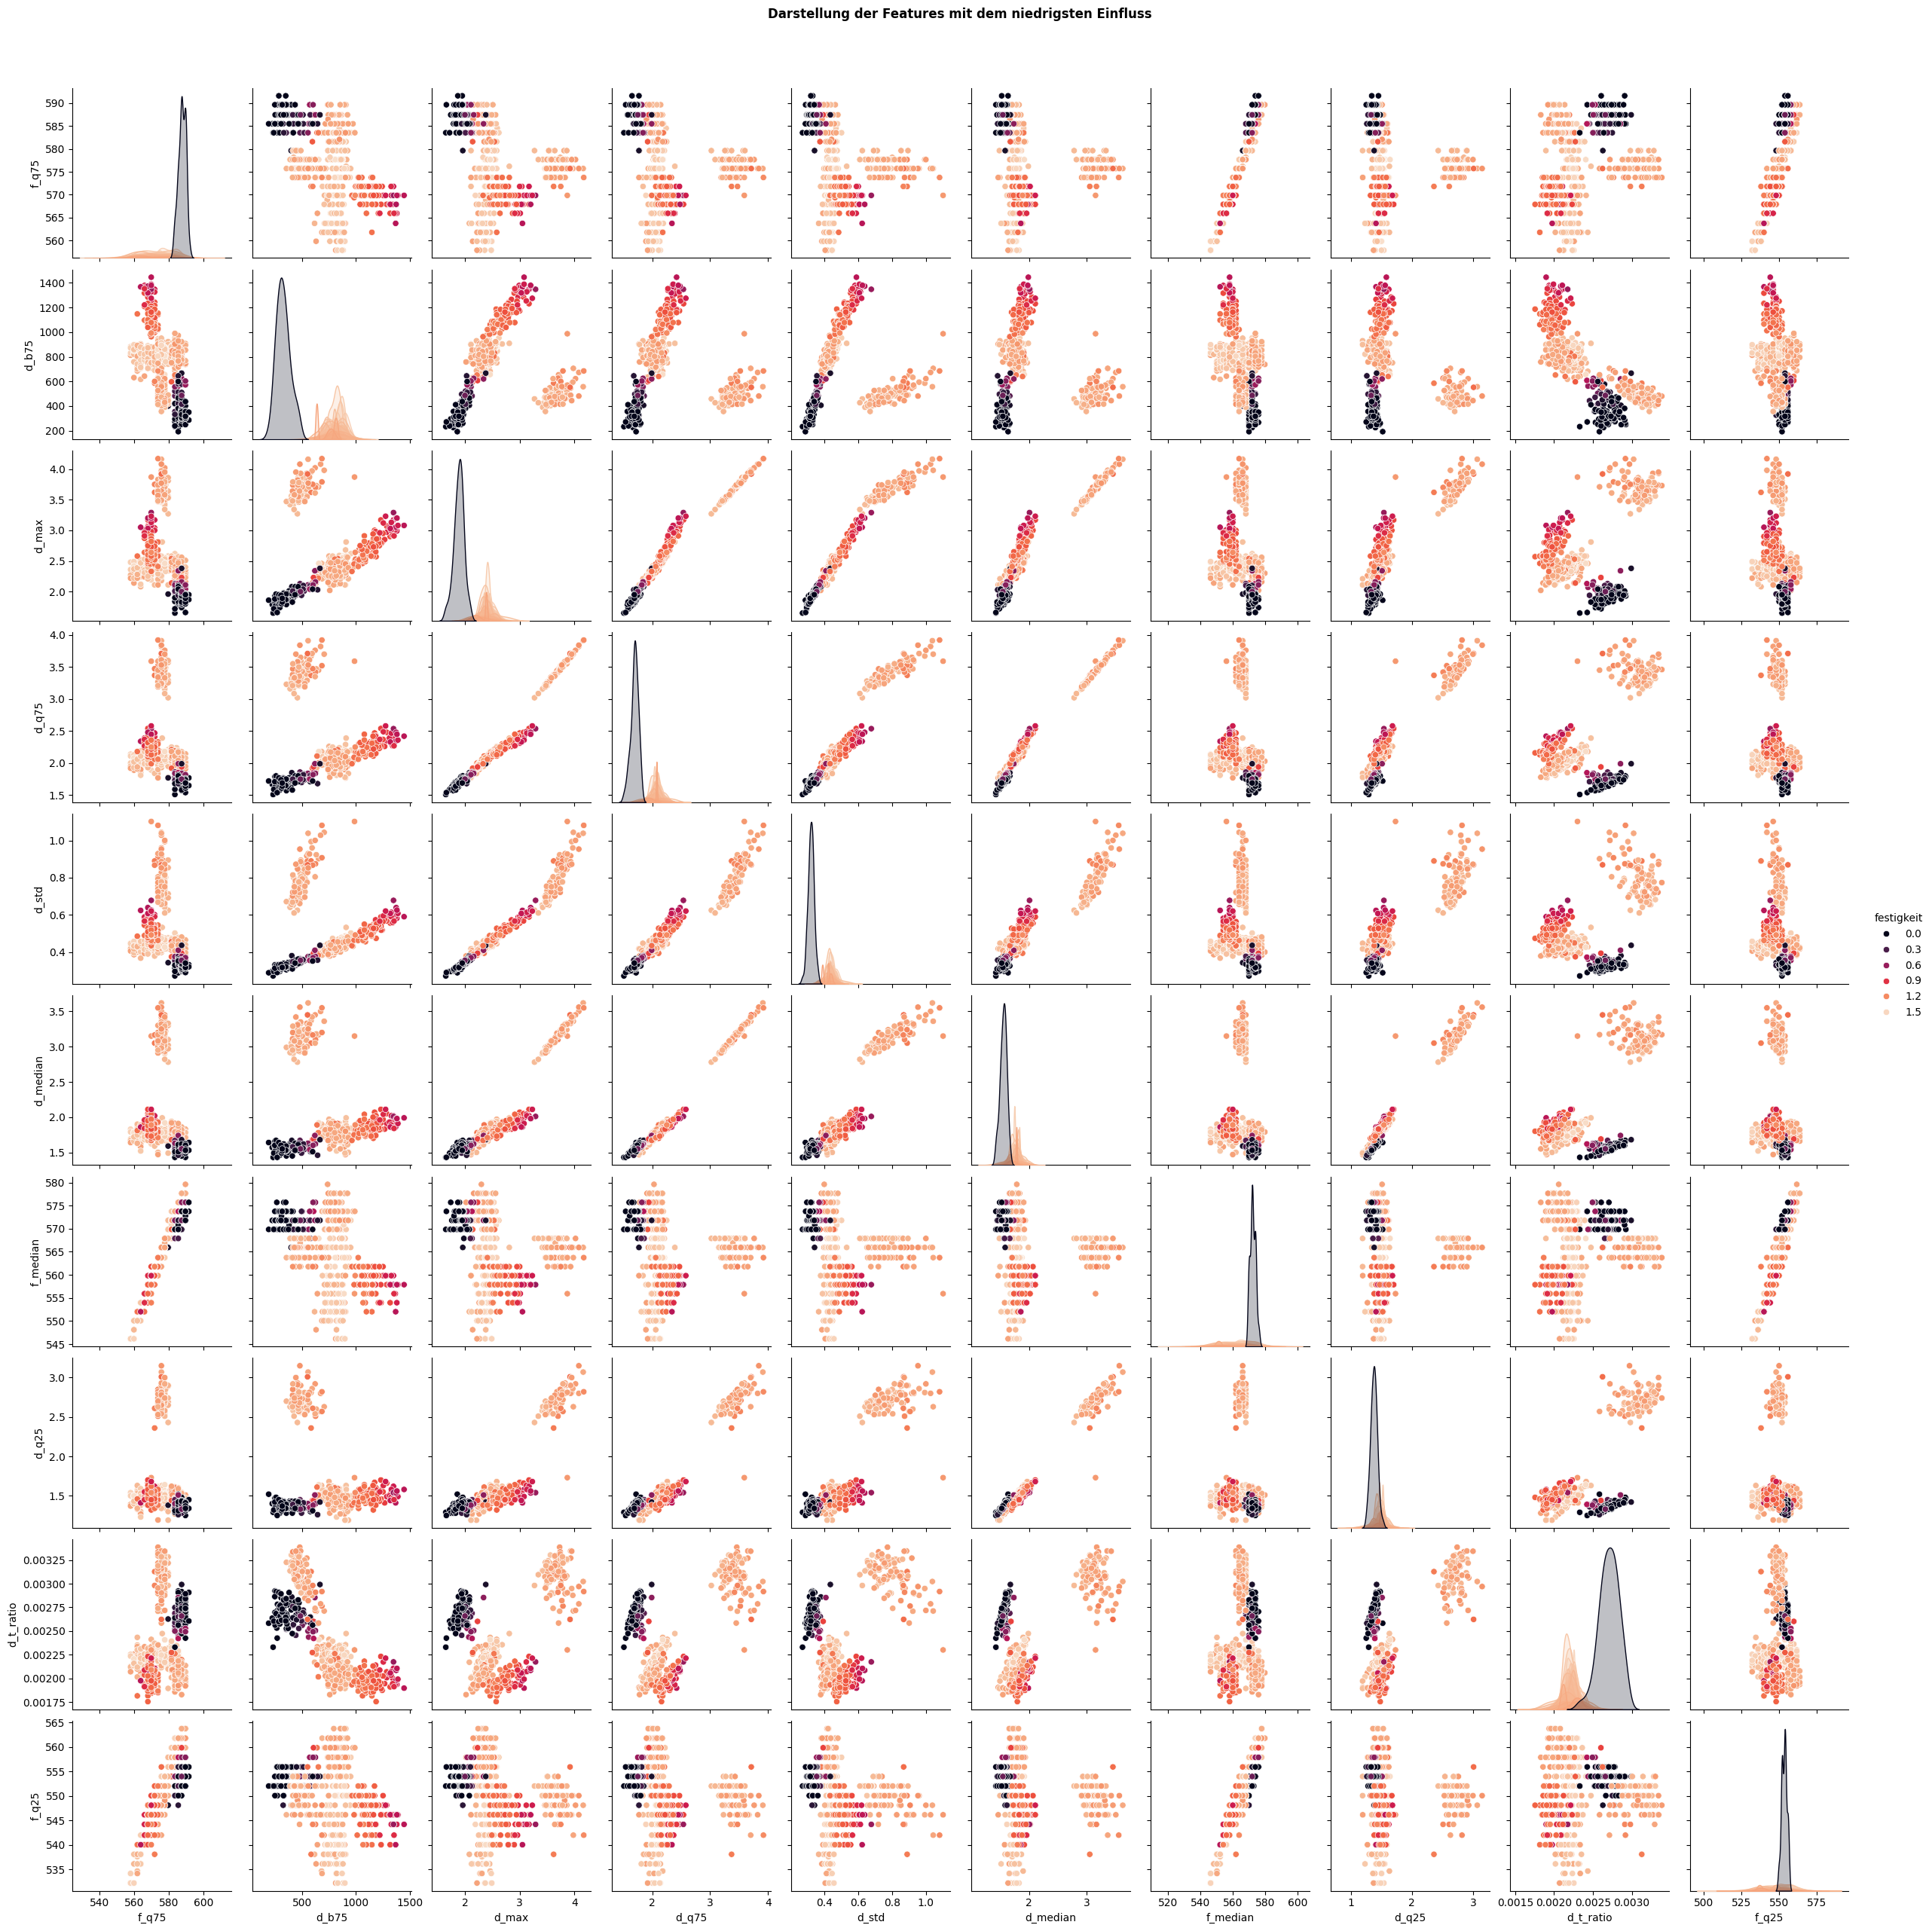

In [70]:
bad = sns.pairplot(X_df[corr_matrix.head(1).index.append(corr_matrix.tail(10).index)], hue='festigkeit', palette='rocket')
plt.suptitle("Darstellung der Features mit dem niedrigsten Einfluss", y=1.03, weight='bold')
plt.show()  

<b><font color='lightgreen'> Feature Importance mit Random Forest </b>

✅ Features mit hoher Bedeutung können für SVR getestet werden.          
❌ Features mit sehr niedriger Bedeutung (< 0.01) können entfernt werden.  

🏆
 p_d_ratio    0.541759
f_t_ratio    0.096660
p_f_ratio    0.076719
d_b75        0.067060
p_max        0.053885
p_t_ratio    0.044081
p_q75        0.037701
p_median     0.026752
p_std        0.021030
t_max        0.009761
p_q25        0.009500
d_std        0.008603
f_std        0.001141
d_t_ratio    0.000701
f_max        0.000688
dtype: float64


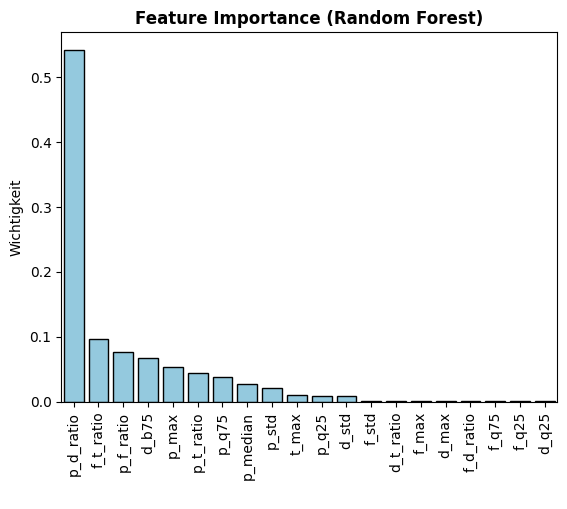

In [71]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Modell trainieren
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_scaled, X_festigkeit) 

# Feature Importance berechnen
feat_importance_rf = pd.Series(rf.feature_importances_, index=STATS).sort_values(ascending=False)

# Top 15 Features anzeigen
print("🏆\n", feat_importance_rf.head(15))

#plt.figure(figsize=(12, 6))
sns.barplot(x=feat_importance_rf.index[:20], y=feat_importance_rf.values[:20], color='skyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.title("Feature Importance (Random Forest)", weight='bold')
plt.xlabel(" ")
plt.ylabel("Wichtigkeit")
plt.show()

<b><font color='lightgreen'> Feature Importance mit SVR </b>

In [72]:
from sklearn.svm import SVR
from sklearn.feature_selection import RFE

# SVR mit linearem Kernel
svr = SVR(kernel="linear")

# RFE durchführen
feat_importance_svr = RFE(svr, n_features_to_select=15, step=1)
feat_importance_svr.fit(X_scaled, X_festigkeit)

# Features mit höchster Bedeutung
feat_importance_svr = np.array(STATS)[feat_importance_svr.support_]
print("🏆 Beste Features für SVR:", feat_importance_svr)

🏆 Beste Features für SVR: ['p_median' 'p_max' 'p_q25' 'p_q75' 'p_f_ratio' 'f_d_ratio' 'f_t_ratio'
 'd_median' 'd_std' 'd_max' 'd_q25' 'd_q75' 'd_t_ratio' 'd_b75' 't_max']


<font color='lightgreen'> Feature Importance mit Statistischen Tests:<br><br><b> 📌 ANOVA-F-Test (für lineare Zusammenhänge) </b>

✅ Features mit hohem F-Wert und niedrigem p-Wert (< 0.05) sind relevant.       
❌ Features mit hohem p-Wert (> 0.05) können entfernt werden.

In [73]:
from sklearn.feature_selection import f_regression

# F-Werte und p-Werte berechnen
f_values, p_values = f_regression(X_scaled, X_festigkeit)

# Ergebnisse als DataFrame
anova_results = pd.DataFrame({"Feature": STATS, "F-Score": f_values, "p-Value": p_values})
anova_results = anova_results.sort_values(by="F-Score", ascending=False)

# Top 10 Features anzeigen
# anova_results.head(10)

print("\nfolgende Features sind relevant: ")
anova_results[(anova_results['F-Score']>600) & (anova_results['p-Value']<0.05)].set_index('Feature')


folgende Features sind relevant: 


F-Score        p-Value
Feature                              
p_max      1646.233577  6.994215e-174
p_t_ratio  1343.019274  5.079132e-155
p_q75      1303.766745  2.294520e-152
p_median   1111.051237  1.763656e-138
f_t_ratio  1007.482265  2.353798e-130
p_f_ratio   962.028304  1.273429e-126
p_q25       838.587802  6.623979e-116
p_d_ratio   710.312915  9.600828e-104

In [74]:
print("Folgende Features können entfernt werden: ")
anova_results[anova_results['p-Value']>0.05]

Folgende Features können entfernt werden: 


Empty DataFrame
Columns: [Feature, F-Score, p-Value]
Index: []

<b><h4><font color='lightgreen'> ____________________________________________________________________________________________________________________________________<br> 

Hauptkomponentenanalyse (PCA) - sinnvoll? </h4></b>

✅ Falls viele Werte nahe ±1 sind bei Korrelationsmatrix → PCA kann helfen, redundante Features zu eliminieren            
❌ Falls Korrelationen gering sind → PCA bringt wahrscheinlich keinen Vorteil             

In [75]:
# Top 10 Features mit höchster Korrelation zur Zugfestigkeit anzeigen
corr_matrix.head(10)

festigkeit    1.000000
p_max         0.856469
p_t_ratio     0.831814
p_q75         0.827983
p_median      0.806287
f_t_ratio     0.792166
p_f_ratio     0.785286
p_q25         0.764026
p_d_ratio     0.736833
t_max         0.672000
Name: festigkeit, dtype: float64

<b><h4><font color='lightgreen'>  </h4></b>

✅ Falls viele Features eine sehr geringe Varianz haben → PCA kann helfen, unwichtige Features zu eliminieren           
❌ Falls alle Features eine hohe Varianz haben → PCA könnte nicht nötig sein             

In [76]:
feature_variance = X_df.var().sort_values(ascending=True)
print("Features mit geringster Varianz:\n", feature_variance.head(15))

Features mit geringster Varianz:
 d_t_ratio     1.631056e-07
f_t_ratio     1.992036e-02
d_std         2.389841e-02
festigkeit    2.208446e-01
d_q25         2.277321e-01
d_median      2.866213e-01
d_q75         3.056343e-01
d_max         3.161249e-01
p_f_ratio     5.003237e-01
p_t_ratio     1.347763e+00
f_std         1.451561e+01
f_q25         4.503816e+01
f_median      5.735092e+01
f_q75         6.838864e+01
f_max         1.209421e+02
dtype: float64


<b><font color='lightgreen'> PCA ausprobieren und den Erklärungsgrad prüfen </b>

✅ Falls 90-95% der Varianz mit wenigen Komponenten erklärt werden → PCA kann helfen            
❌ Falls viele PCs benötigt werden (fast so viele wie Original-Features) → PCA bringt keinen Vorteil            

PC1: 59.543% der Gesamtvarianz
PC2: 83.746% der Gesamtvarianz
PC3: 96.236% der Gesamtvarianz
PC4: 97.906% der Gesamtvarianz
PC5: 98.761% der Gesamtvarianz
PC6: 99.442% der Gesamtvarianz
PC7: 99.626% der Gesamtvarianz
PC8: 99.754% der Gesamtvarianz
PC9: 99.830% der Gesamtvarianz
PC10: 99.878% der Gesamtvarianz


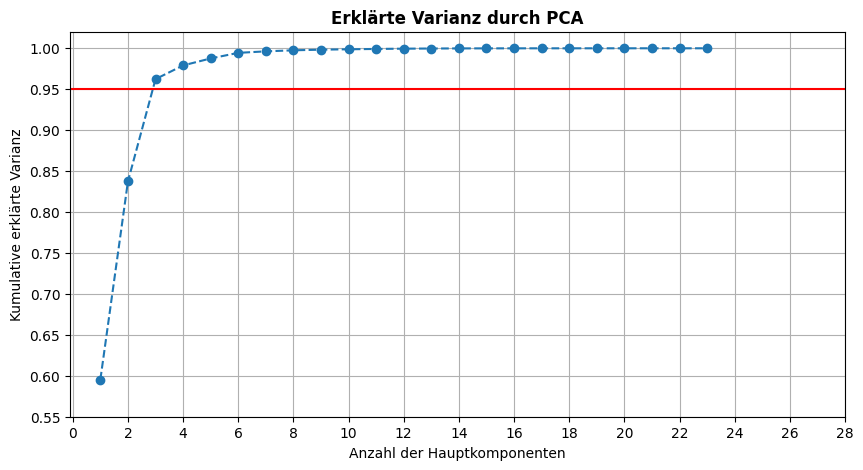

Die ersten 5 Hauptkomponenten erklären mindestens 98% der Varianz.


In [77]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Erklärte kumulative Varianz jeder Hauptkomponente
explained_variance = np.cumsum(pca.explained_variance_ratio_)
for i, var in enumerate(explained_variance[:10]):  
    print(f"PC{i+1}: {var:.3%} der Gesamtvarianz")

# Plot der erklärten Varianz
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker="o", linestyle="--")
plt.axhline(y=0.95, color='r', linestyle='-')  # Linie für 95% Varianz
plt.yticks(np.arange(0.55, 1 + 0.05, 0.05))
plt.xticks(np.arange(0, 30, 2))
plt.xlabel("Anzahl der Hauptkomponenten")
plt.ylabel("Kumulative erklärte Varianz")
plt.title("Erklärte Varianz durch PCA", weight='bold')
plt.grid()
plt.show()

# Anzahl der PCs ermitteln, die mindestens 95% der Varianz erklären
num_pcs = np.argmax(explained_variance >= 0.98) + 1  # Weil Indizes bei 0 starten

print(f"Die ersten {num_pcs} Hauptkomponenten erklären mindestens 98% der Varianz.")

# Diagramm zeigt, wie viel Varianz durch jede Hauptkomponente (PC) erklärt wird.

<b><font color='lightgreen'> PCA Darstellung mit 3 Hauptkomponenten </b>    


<i> https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html   

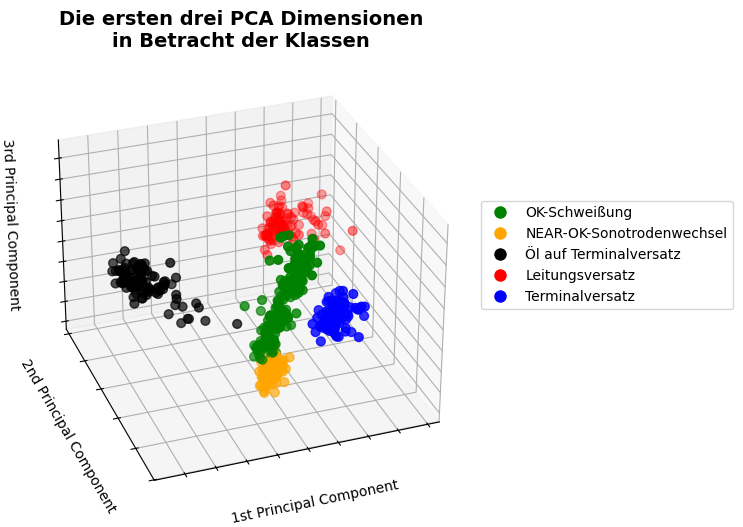

In [78]:
label = {'ok': 0,
 'near_ok_sonowechsel': 1,
 'fehler_oel': 2,
 'fehler_leitungsversatz': 3,
 'fehler_terminversatz': 4}

# Farben den Klassen zuordnen
color_map = dict(zip([0, 1, 2, 3, 4], colors))
scatter_colors = [color_map[label] for label in X_label]

# PCA-Transformation auf 3 Hauptkomponenten
pca_scaler = PCA(n_components=3)
X_pca = pca_scaler.fit_transform(X_scaled)

# 3D-Plot 
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

# Punktwolke mit Farbcodierung basierend auf der Zielvariable
scatter = ax.scatter(
    X_pca[:, 0], 
    X_pca[:, 1], 
    X_pca[:, 2], 
    c=scatter_colors, 
    s=40
)

ax.set_title("Die ersten drei PCA Dimensionen\nin Betracht der Klassen", fontsize=14, fontweight="bold")
ax.set(
    xlabel="1st Principal Component",
    ylabel="2nd Principal Component",
    zlabel="3rd Principal Component",
)

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

legend_elements = [Line2D([0], [0], marker='o', color='w', label=lbl, 
                          markerfacecolor=clr, markersize=10) 
                   for lbl, clr in zip(labels, colors)]

ax.legend(handles=legend_elements, loc="best",  bbox_to_anchor=(1.58, 0.7))
plt.show()

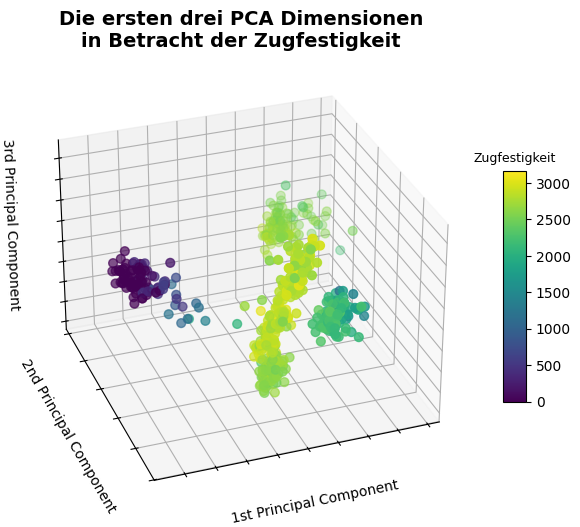

In [79]:
y = X_df["festigkeit"]*SCALE  

# PCA-Transformation auf 3 Hauptkomponenten
pca_scaler = PCA(n_components=3)
X_pca = pca_scaler.fit_transform(X_scaled)

# 3D-Plot 
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

# Punktwolke mit Farbcodierung basierend auf der Zielvariable
scatter = ax.scatter(
    X_pca[:, 0], 
    X_pca[:, 1], 
    X_pca[:, 2], 
    c=y, 
    cmap="viridis", 
    s=40
)

ax.set_title("Die ersten drei PCA Dimensionen\nin Betracht der Zugfestigkeit", fontsize=14, fontweight="bold")
ax.set(
    xlabel="1st Principal Component",
    ylabel="2nd Principal Component",
    zlabel="3rd Principal Component",
)

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.ax.set_title("Zugfestigkeit", fontsize=9)
plt.show()

In [80]:
# PCA-Komponentenmatrix als DataFrame
pca_features = pd.DataFrame(pca_scaler.components_, columns=STATS)
# Ausgabe der Features, die am meisten zur ersten Hauptkomponente beitragen
pca_features

p_median     p_std     p_max     p_q25     p_q75  p_f_ratio  p_d_ratio  \
0  0.252069  0.125298  0.254429  0.258338  0.251547   0.258736   0.262706   
1  0.112177  0.341448  0.086717  0.066462  0.113415   0.046260  -0.069350   
2 -0.134795 -0.142960 -0.128039 -0.119661 -0.135249  -0.154705  -0.077468   

   p_t_ratio  f_median     f_std  ...  f_d_ratio  f_t_ratio  d_median  \
0   0.259232  0.127619  0.209612  ...   0.218739   0.264372 -0.178298   
1   0.067978  0.154643  0.165072  ...  -0.240910   0.054255  0.317514   
2  -0.124774  0.466307  0.134312  ...   0.039517  -0.089245 -0.025215   

      d_std     d_max     d_q25     d_q75  d_t_ratio     d_b75     t_max  
0 -0.211197 -0.220778 -0.157265 -0.201412   0.013297 -0.135048 -0.261380  
1  0.241669  0.234657  0.340160  0.281425   0.405127 -0.326118 -0.008420  
2 -0.031134 -0.021086 -0.030030 -0.023492  -0.139452  0.075106  0.106624  

[3 rows x 23 columns]

In [81]:
# Wichtigste Features für jede Hauptkomponente anzeigen
top_features = pca_features.abs().idxmax(axis=1)
top_features

0    f_t_ratio
1    d_t_ratio
2        f_q25
dtype: object

<b><h4><font color='lightgreen'> ____________________________________________________________________________________________________________________________________<br> 

Schunk-Kurve </h4></b>             

In [82]:
schunk = pd.read_csv("Rohdaten/schunk_anlage_lkurve.txt", sep='\t', decimal=',')
schunk.insert(0, "ms", list(range(10, 10 * len(schunk) + 10, 10)))
schunk['dist'] = schunk['dist'].astype(float)
schunk

ms  power  dist
0    10     12  9.23
1    20    102  9.22
2    30    614  9.22
3    40   1793  9.20
4    50   3681  9.15
..  ...    ...   ...
58  590   8444  6.60
59  600   8413  6.54
60  610   8442  6.50
61  620   8433  6.44
62  630   8454  6.40

[63 rows x 3 columns]

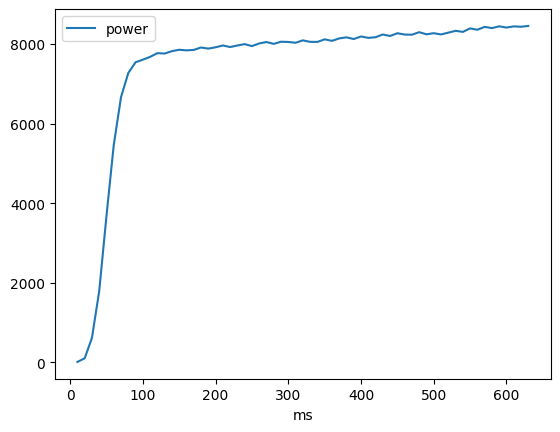

In [83]:
schunk.plot(x='ms', y='power')
plt.show()

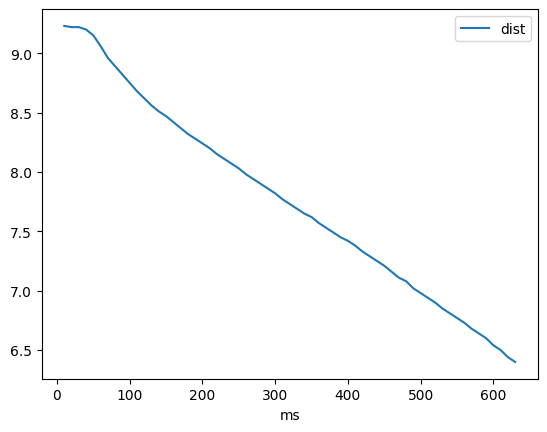

In [84]:
schunk.plot(x='ms', y='dist')
plt.show()

<b><h4><font color='lightgreen'> ____________________________________________________________________________________________________________________________________<br> 

Neues statistisches Feature "bend" </h4></b><br>
➔ Knickpunkt in der Kurve finden als neues statistisches Feature                

In [85]:
df_ok = helper.read_special_csv('Rohdaten_renamed/ok/schweisskurven/1569.csv')
df_ok

ms     power    force     dist
0        1     0.000    0.000  0.00000
1        2   106.204  502.701  0.00000
2        3   106.204  500.748  0.00000
3        4   108.646  502.701  0.00000
4        5   108.646  504.654  0.00000
...    ...       ...      ...      ...
1413  1414  2409.740  534.196  2.14001
1414  1415  2417.070  536.149  2.14001
1415  1416  2417.070  532.243  2.14001
1416  1417  2389.900  571.795  2.14001
1417  1418  2348.090  542.009  2.14001

[1418 rows x 4 columns]

In [86]:
p_max = df_ok.power.max()

bend_50 = df_ok.loc[df_ok.power >= 0.50*p_max].iloc[0]
bend_75 = df_ok.loc[df_ok.power >= 0.75*p_max].iloc[0]

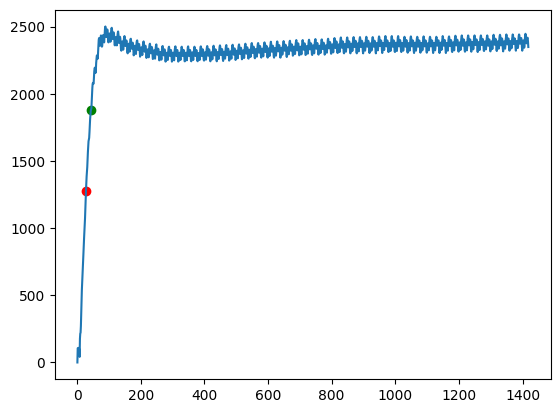

In [87]:
plt.plot(df_ok.ms, df_ok.power)
plt.scatter(bend_50.ms, bend_50.power, c='red')
plt.scatter(bend_75.ms, bend_75.power, c='green')

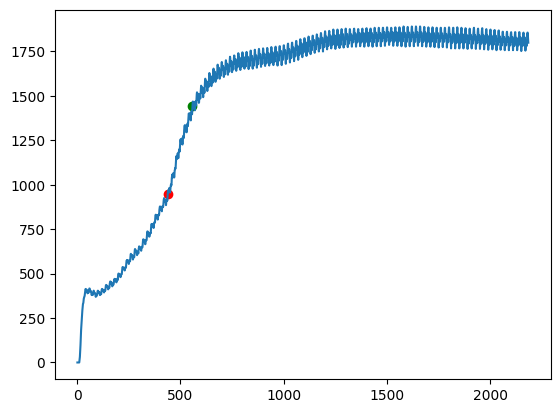

In [88]:
df_leitung = helper.read_special_csv('Rohdaten_renamed/fehler_leitungsversatz/schweisskurven/2510.csv')

p_max = df_leitung.power.max()

bend_50 = df_leitung.loc[df_leitung.power >= 0.50*p_max].iloc[0]
bend_75 = df_leitung.loc[df_leitung.power >= 0.75*p_max].iloc[0]

plt.plot(df_leitung.ms, df_leitung.power)
plt.scatter(bend_50.ms, bend_50.power, c='red')
plt.scatter(bend_75.ms, bend_75.power, c='green')